In [10]:
import warnings
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

sns.set()
%matplotlib inline
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_column', 100)
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

In [15]:
def show_graph(data, p, z):
    x = np.array(data['t']).reshape(-1, 1)
    y = np.array(data['a'])
    
    model = LinearRegression()
    model.fit(x, y)
    
    predicted_alpha = model.predict([[p]])
    
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, model.predict(x), color='red', label='Linear Regression')
    plt.xlabel('t')
    plt.ylabel('a')
    plt.legend()
    plt.show()
    y_pred = model.predict(x)
    print('Медианная абсолютная ошибка:', median_absolute_error(y, y_pred))
    print('Средняя абсолютная ошибка:', mean_absolute_error(y, y_pred))
    print('Средняя квадратичная ошибка:', mean_squared_error(y, y_pred))
    
    print(f'Значение при {z}={p}:', round(predicted_alpha[0], 2))

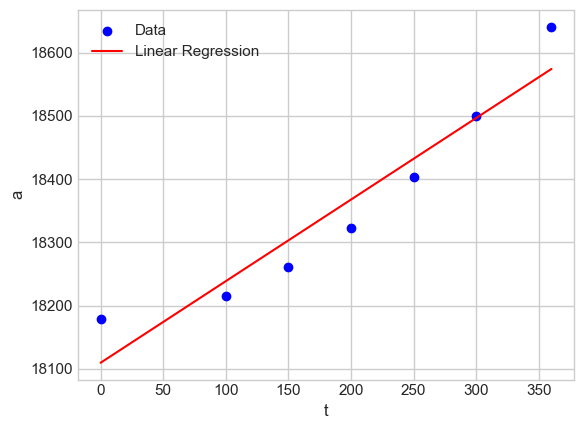

Медианная абсолютная ошибка: 42.251975972179935
Средняя абсолютная ошибка: 39.747527211959614
Средняя квадратичная ошибка: 2062.2391039248078
Значение при α=2000: 20691.76


In [16]:
#ДЗ 1.1
data_f = {'t': [0, 100, 150, 200, 250, 300, 360], 'a': [18179, 18216, 18261, 18323, 18403, 18500, 18641]}

show_graph(data_f, 2000, "α")

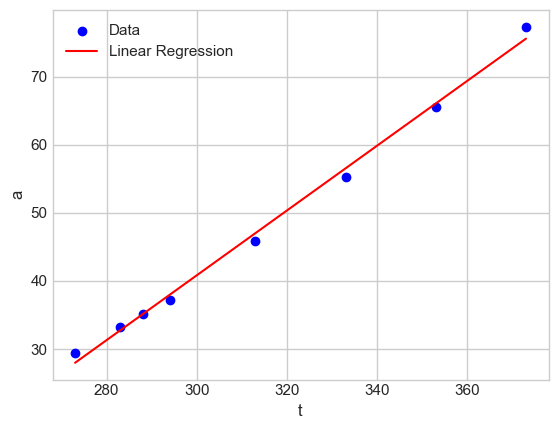

Медианная абсолютная ошибка: 0.9992099322798964
Средняя абсолютная ошибка: 0.9440249408137431
Средняя квадратичная ошибка: 1.1739566701536013
Значение при S=100: -54.3


In [17]:
#ДЗ 1.2
data_s = {'t': [273, 283, 288, 294, 313, 333, 353, 373], 'a': [29.4, 33.3, 35.2, 37.2, 45.8, 55.2, 65.6, 77.3]}

show_graph(data_s, 100, "S")

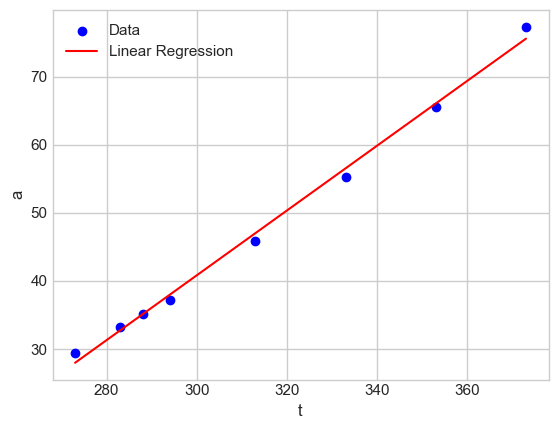

Медианная абсолютная ошибка: 0.9992099322798964
Средняя абсолютная ошибка: 0.9440249408137431
Средняя квадратичная ошибка: 1.1739566701536013
Значение при P=20: -92.36


In [18]:
#ДЗ 1.3
data_t = {'t': [3.33, 1.63, 0.87, 0.43, 0.27, 0.17, 0.12], 'a': [0.48, 1.04, 2.03, 4.25, 7.16, 11.49, 17.59]}

show_graph(data_s, 20, "P")

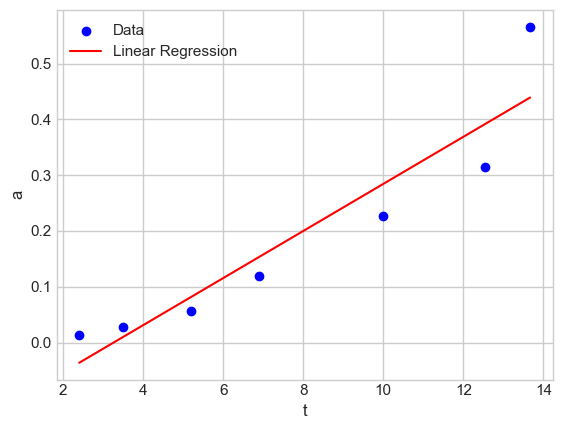

Медианная абсолютная ошибка: 0.05034711512837109
Средняя абсолютная ошибка: 0.055747814044307696
Средняя квадратичная ошибка: 0.004298218492862321
Значение при S=1: -0.1


In [20]:
#ДЗ 1.4
data_fo = {'t': [2.4, 3.5, 5.2, 6.89, 10, 12.55, 13.67], 'a': [0.014, 0.028, 0.056, 0.119, 0.226, 0.315, 0.566]}

show_graph(data_fo, 1, "S")

In [21]:
#ДЗ 2
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
           "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
           "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=columns, na_values='?')
df.dropna(inplace=True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


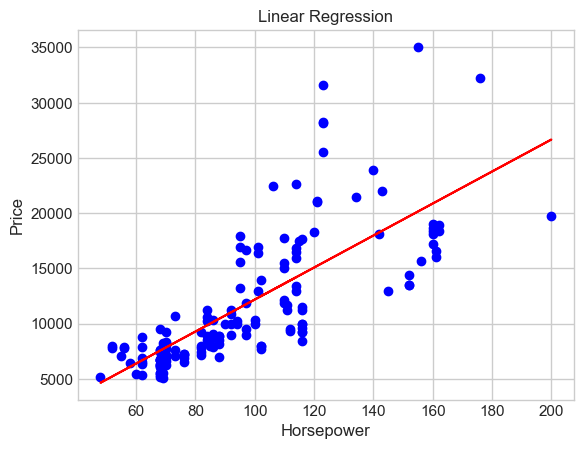

In [24]:
data = df[['price', 'horsepower']]
data.head()

X = data.iloc[:, 1:].values
y = data["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=0, shuffle=True)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

plt.scatter(X, y, color = 'blue')
plt.plot(X, model.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df[['horsepower', 'length', 'highway-mpg']], df['price'], train_size=0.7, random_state=0, shuffle=True)
poly_reg = PolynomialFeatures(degree=3)
x_train_poly, x_test_poly = poly_reg.fit_transform(x_train), poly_reg.fit_transform(x_test)
model = LinearRegression()
model.fit(x_train_poly, y_train)
print('Тренировочный:', model.score(x_train_poly, y_train))
print('Тестовый:', model.score(x_test_poly, y_test))

Тренировочный: 0.8499491941676384
Тестовый: 0.2504622365753756


In [26]:
model = SVR()
scaler_x, scaler_y = StandardScaler(), StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train.to_numpy())
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape((-1, 1)))
model.fit(x_train_scaled, y_train_scaled)
test_score = model.score(scaler_x.fit_transform(x_test), scaler_y.fit_transform(y_test.values.reshape((-1, 1))))
train_score = model.score(scaler_x.fit_transform(x_train), scaler_y.fit_transform(y_train.values.reshape((-1, 1))))
print('Тренировочный:', train_score)
print('Тестовый:', test_score)

Тренировочный: 0.7333701777459196
Тестовый: 0.7358932241705862


In [27]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)
print('Тренировочный:', model.score(x_train, y_train))
print('Тестовый:', model.score(x_test, y_test))

Тренировочный: 0.9866766983176914
Тестовый: 0.8148613331967568


In [28]:
model = RandomForestRegressor(n_estimators=6, random_state=0)
model.fit(x_train, y_train.ravel())
print('Тренировочный:', model.score(x_train, y_train.ravel()))
print('Тестовый:', model.score(x_test, y_test.ravel()))

Тренировочный: 0.9003156484420212
Тестовый: 0.8179162154972379


In [30]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=columns, na_values="?")
df.dropna(inplace=True)
encoder = LabelEncoder()
x_cat = df.loc[:, ['horsepower', 'engine-size', 'engine-type', 'engine-location']]

encoder.fit(x_cat['engine-type'].values)
x_cat['engine-type'] = encoder.fit_transform(x_cat['engine-type'])
x_cat['engine-location'] = x_cat['engine-location'].apply(lambda x: 0 if x == 'front' else 1)
y_cat = df['price']
x_cat_train, x_cat_test, y_cat_train, y_cat_test = train_test_split(x_cat, y_cat, train_size=0.7, random_state=0, shuffle=True)

model = SVR()
scaler_x, scaler_y = StandardScaler(), StandardScaler()
scaler_x.fit(x_cat_train.to_numpy())
scaler_y.fit(y_cat_train.values.reshape((-1, 1)))
x_train_scaled = scaler_x.fit_transform(x_cat_train.to_numpy())
y_train_scaled = scaler_y.fit_transform(y_cat_train.values.reshape((-1, 1)))
model.fit(x_train_scaled, y_train_scaled)
print('Тренировочный:', model.score(x_train_scaled, y_train_scaled))
print('Тестовый:', model.score(scaler_x.fit_transform(x_cat_test), scaler_y.fit_transform(y_cat_test.values.reshape((-1, 1)))))

Тренировочный: 0.7370034611986709
Тестовый: 0.675989602259963


In [31]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_cat_train, y_cat_train)
print('Тренировочный:', model.score(x_cat_train, y_cat_train))
print('Тестовый:', model.score(x_cat_test, y_cat_test))

Тренировочный: 0.9708563475190538
Тестовый: 0.75410728743609


In [32]:
model = RandomForestRegressor(random_state=0, n_estimators=15)
model.fit(x_cat_train, y_cat_train)
print('Тренировочный:', model.score(x_cat_train, y_cat_train))
print('Тестовый:', model.score(x_cat_test, y_cat_test))

Тренировочный: 0.9534287320680734
Тестовый: 0.7658802980816791
